In [1]:
%matplotlib inline
import matplotlib.pyplot as pyplot

from tileable import TileShape
from tile_unit import TileUnit

# All the tiles!
## Basic tile units

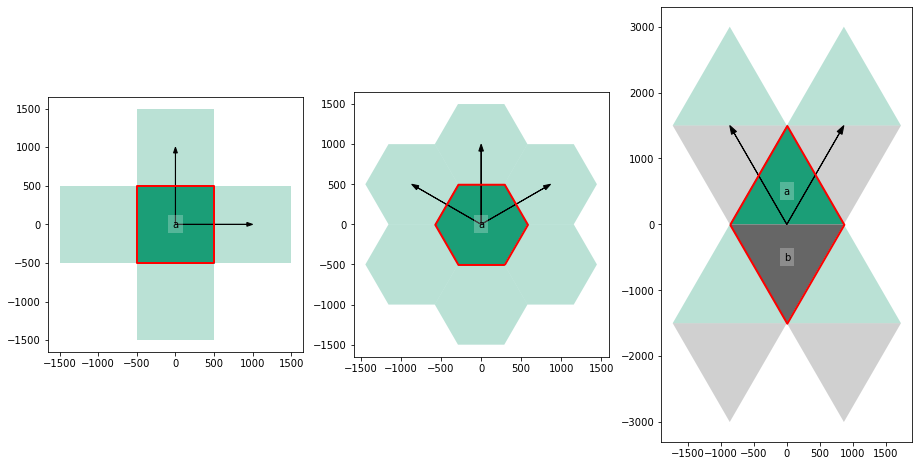

In [2]:
fig = pyplot.figure(figsize = (21, 8))
units = [TileUnit(), 
         TileUnit(tile_shape = TileShape.HEXAGON),
         TileUnit(tile_shape = TileShape.TRIANGLE)]
for u, r, posn in zip(units, [1, 1, 1, 1], range(141, 145)):
    u.plot(ax = fig.add_subplot(posn), r = r, show_vectors = True)

## Cairo
The one true tiling.

<AxesSubplot:>

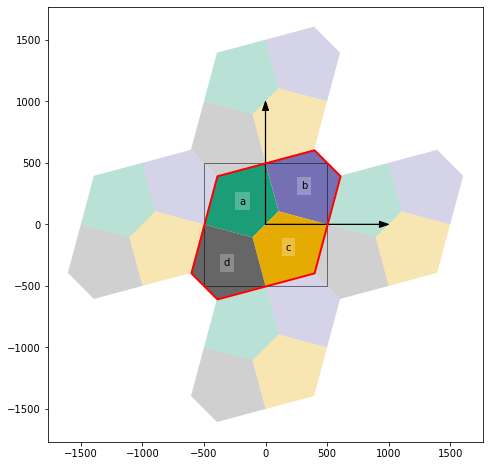

In [3]:
TileUnit(tiling_type = "cairo").plot(r = 1, show_vectors = True)

## Hexagon colourings
Only 3, 4, 7 are supported for now...

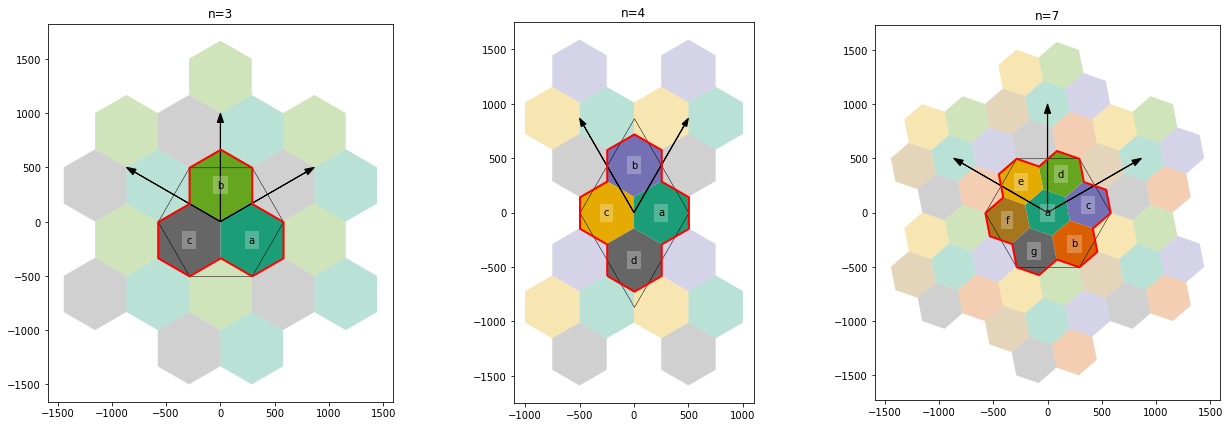

In [4]:
units = [
    TileUnit(tiling_type = "hex-colouring", n = 3),
    TileUnit(tiling_type = "hex-colouring", n = 4),    
    TileUnit(tiling_type = "hex-colouring", n = 7)]
fig = pyplot.figure(figsize = (21, 7))
for u, posn in zip(units, range(1, 4)):
    ax = fig.add_subplot(1, 3, posn)
    ax.set_title(f"n={u.n}")
    u.plot(ax = ax, r = 1, show_vectors = True)

## A square colouring
Just the one for now, because it's nice to have a 5-colour option.

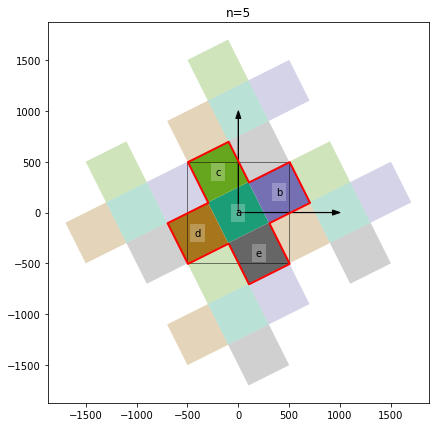

In [5]:
units = [
    TileUnit(tiling_type = "square-colouring", n = 5)]
fig = pyplot.figure(figsize = (7, 7))
for u, posn in zip(units, range(1, 2)):
    ax = fig.add_subplot(1, 1, posn)
    ax.set_title(f"n={u.n}")
    u.plot(ax = ax, r = 1, show_vectors = True)

## Hexagon dissections

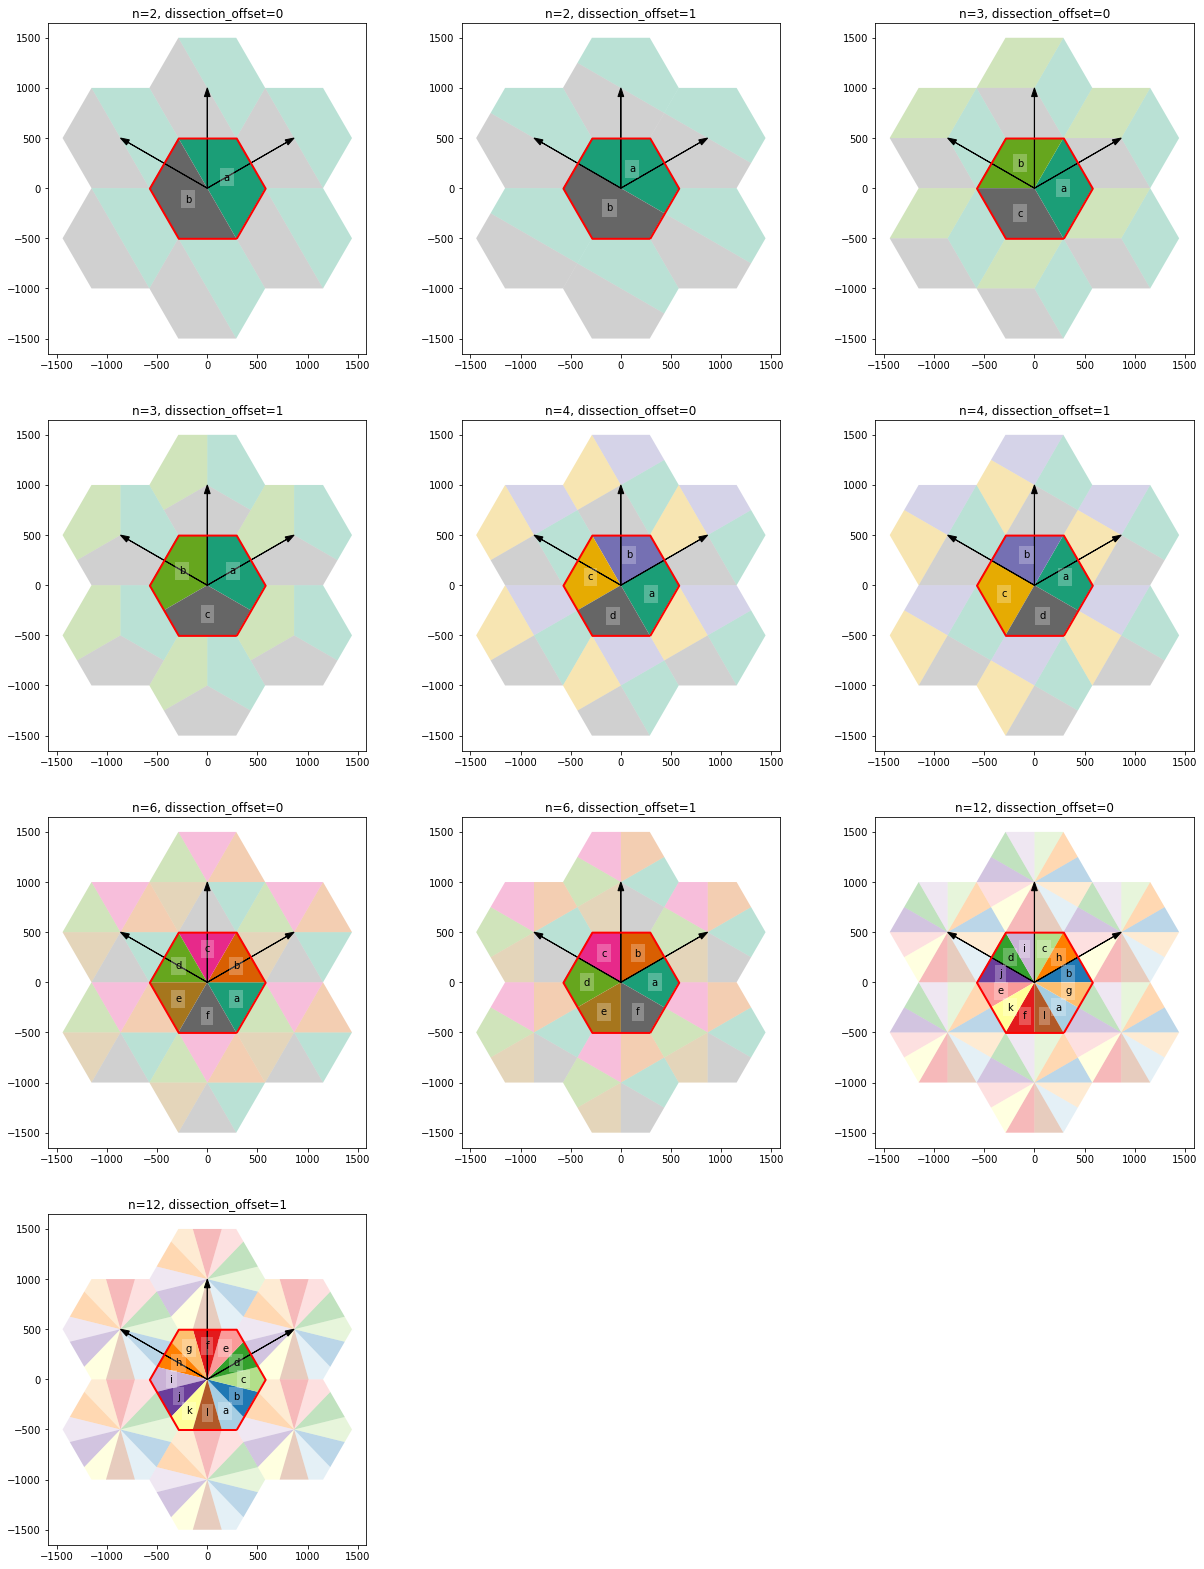

In [6]:
units = [
    TileUnit(tiling_type = "hex-dissection", n = 2, dissection_offset = 0), TileUnit(tiling_type = "hex-dissection", n = 2, dissection_offset = 1), TileUnit(tiling_type = "hex-dissection", n = 3, dissection_offset = 0),TileUnit(tiling_type = "hex-dissection", n = 3, dissection_offset = 1), TileUnit(tiling_type = "hex-dissection", n = 4, dissection_offset = 0),TileUnit(tiling_type = "hex-dissection", n = 4, dissection_offset = 1),
    TileUnit(tiling_type = "hex-dissection", n = 6, dissection_offset = 0), TileUnit(tiling_type = "hex-dissection", n = 6, dissection_offset = 1),
    TileUnit(tiling_type = "hex-dissection", n = 12, dissection_offset = 0),    TileUnit(tiling_type = "hex-dissection", n = 12, dissection_offset = 1)]
fig = pyplot.figure(figsize = (21, 28))
for u, posn in zip(units, range(1, 11)):
    ax = fig.add_subplot(4, 3, posn)
    ax.set_title(f"n={u.n}, dissection_offset={u.dissection_offset}")
    u.plot(ax = ax, r = 1, show_vectors = True)

## Laves tile units
Some of these are determined using the hex dissection.

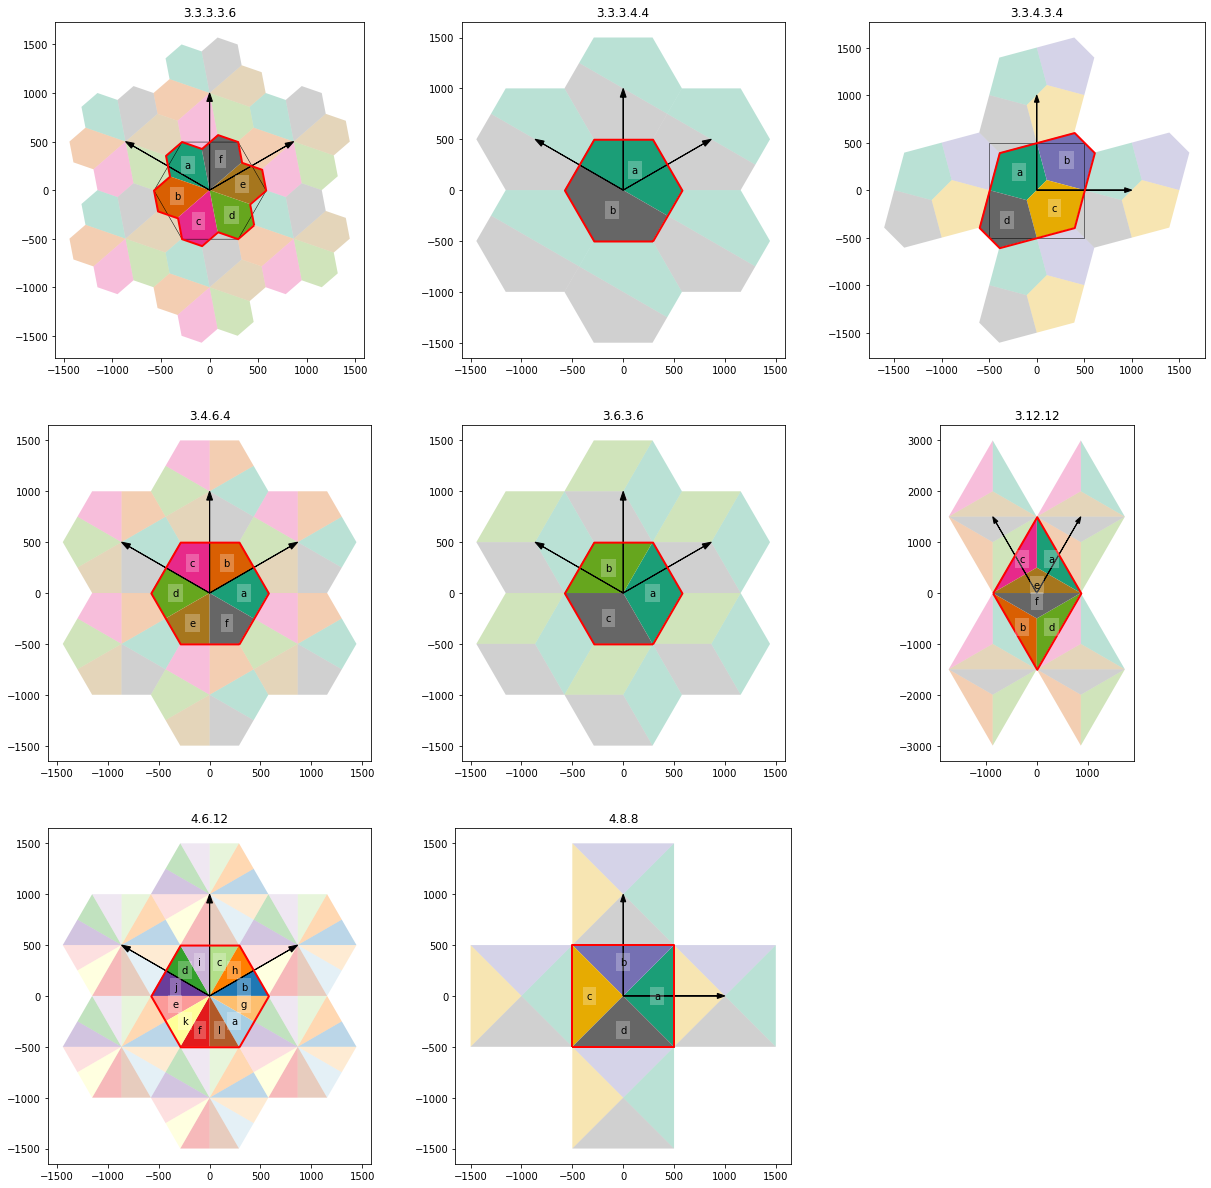

In [7]:
units = [TileUnit(tiling_type = "laves", code = "3.3.3.3.6"), 
         TileUnit(tiling_type = "laves", code = "3.3.3.4.4"), 
         TileUnit(tiling_type = "laves", code = "3.3.4.3.4"),
         TileUnit(tiling_type = "laves", code = "3.4.6.4"), 
         TileUnit(tiling_type = "laves", code = "3.6.3.6"),
         TileUnit(tiling_type = "laves", code = "3.12.12"),
         TileUnit(tiling_type = "laves", code = "4.6.12"),
         TileUnit(tiling_type = "laves", code = "4.8.8")]
fig = pyplot.figure(figsize = (21, 21))
for u, posn in zip(units, range(331, 339)):
    ax = fig.add_subplot(posn)
    ax.set_title(u.code)
    u.plot(ax = ax, r = 1, show_vectors = True)

## Archimedean tile units

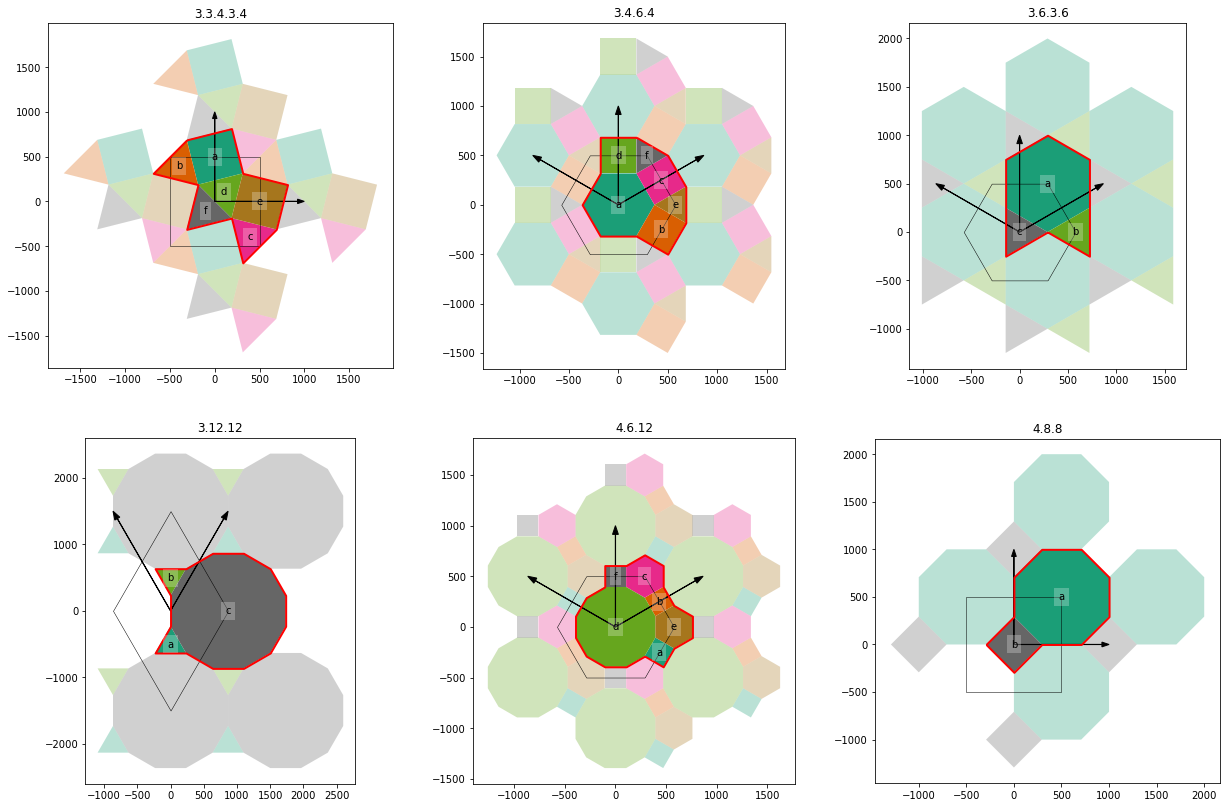

In [8]:
units = [TileUnit(tiling_type = "archimedean", code = "3.3.4.3.4"),
         TileUnit(tiling_type = "archimedean", code = "3.4.6.4"), 
         TileUnit(tiling_type = "archimedean", code = "3.6.3.6"),
         TileUnit(tiling_type = "archimedean", code = "3.12.12"),
         TileUnit(tiling_type = "archimedean", code = "4.6.12"),
         TileUnit(tiling_type = "archimedean", code = "4.8.8")]

fig = pyplot.figure(figsize = (21, 14))
for u, posn in zip(units, range(231, 237)):
    ax = fig.add_subplot(posn)
    ax.set_title(u.code)
    u.plot(ax = ax, r = 1, show_vectors = True)